### 1-Read Dataset

In [2]:
# import libarary
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# delete warnings
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# read data
data=pd.read_csv(r'D:\ML project & tasks\Datasets\StudentsPerformance.csv')

In [5]:
# #display first 5 row
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 2-EDA

In [7]:
# display shape of data
data.shape

(1000, 8)

In [8]:
# show information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# display columns name
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [10]:
# cheak missing value
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
# check duplicated
data.duplicated().sum()

0

In [12]:
# display categorical columns
categorical_columns=[]
for i in data.columns:
    if data[i].dtype=='object':
        categorical_columns.append(i)
print(categorical_columns)        

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [13]:
# display unique value in categorical columns
for i in categorical_columns:
    print(f'column name : {i}')
    print(data[i].unique())
    print('--'*40)

column name : gender
['female' 'male']
--------------------------------------------------------------------------------
column name : race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
--------------------------------------------------------------------------------
column name : parental level of education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
--------------------------------------------------------------------------------
column name : lunch
['standard' 'free/reduced']
--------------------------------------------------------------------------------
column name : test preparation course
['none' 'completed']
--------------------------------------------------------------------------------


In [14]:
data['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [30]:
# use ordinal encoder on parental level of education as this column need arrangement
from sklearn.preprocessing import OrdinalEncoder
Encoder=OrdinalEncoder(categories=[["some high school","high school","some college","associate's degree",
                                    "bachelor's degree","master's degree"]])

data[['parental level of education']]=Encoder.fit_transform(data[['parental level of education']])

In [32]:
# display categorical columns
categorical_columns=[]
for i in data.columns:
    if data[i].dtype=='object':
        categorical_columns.append(i)
print(categorical_columns)        

['gender', 'race/ethnicity', 'lunch', 'test preparation course']


In [34]:
# display unique value in categorical columns
for i in categorical_columns:
    print(f'column name : {i}')
    print(data[i].unique())
    print('--'*40)

column name : gender
['female' 'male']
--------------------------------------------------------------------------------
column name : race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
--------------------------------------------------------------------------------
column name : lunch
['standard' 'free/reduced']
--------------------------------------------------------------------------------
column name : test preparation course
['none' 'completed']
--------------------------------------------------------------------------------


In [36]:
# encoding categorical columns by use label encoder
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
for i in categorical_columns:
    data[i]=encoder.fit_transform(data[i])

In [38]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,4.0,1,1,72,72,74
1,0,2,2.0,1,0,69,90,88
2,0,1,5.0,1,1,90,95,93
3,1,0,3.0,0,1,47,57,44
4,1,2,2.0,1,1,76,78,75


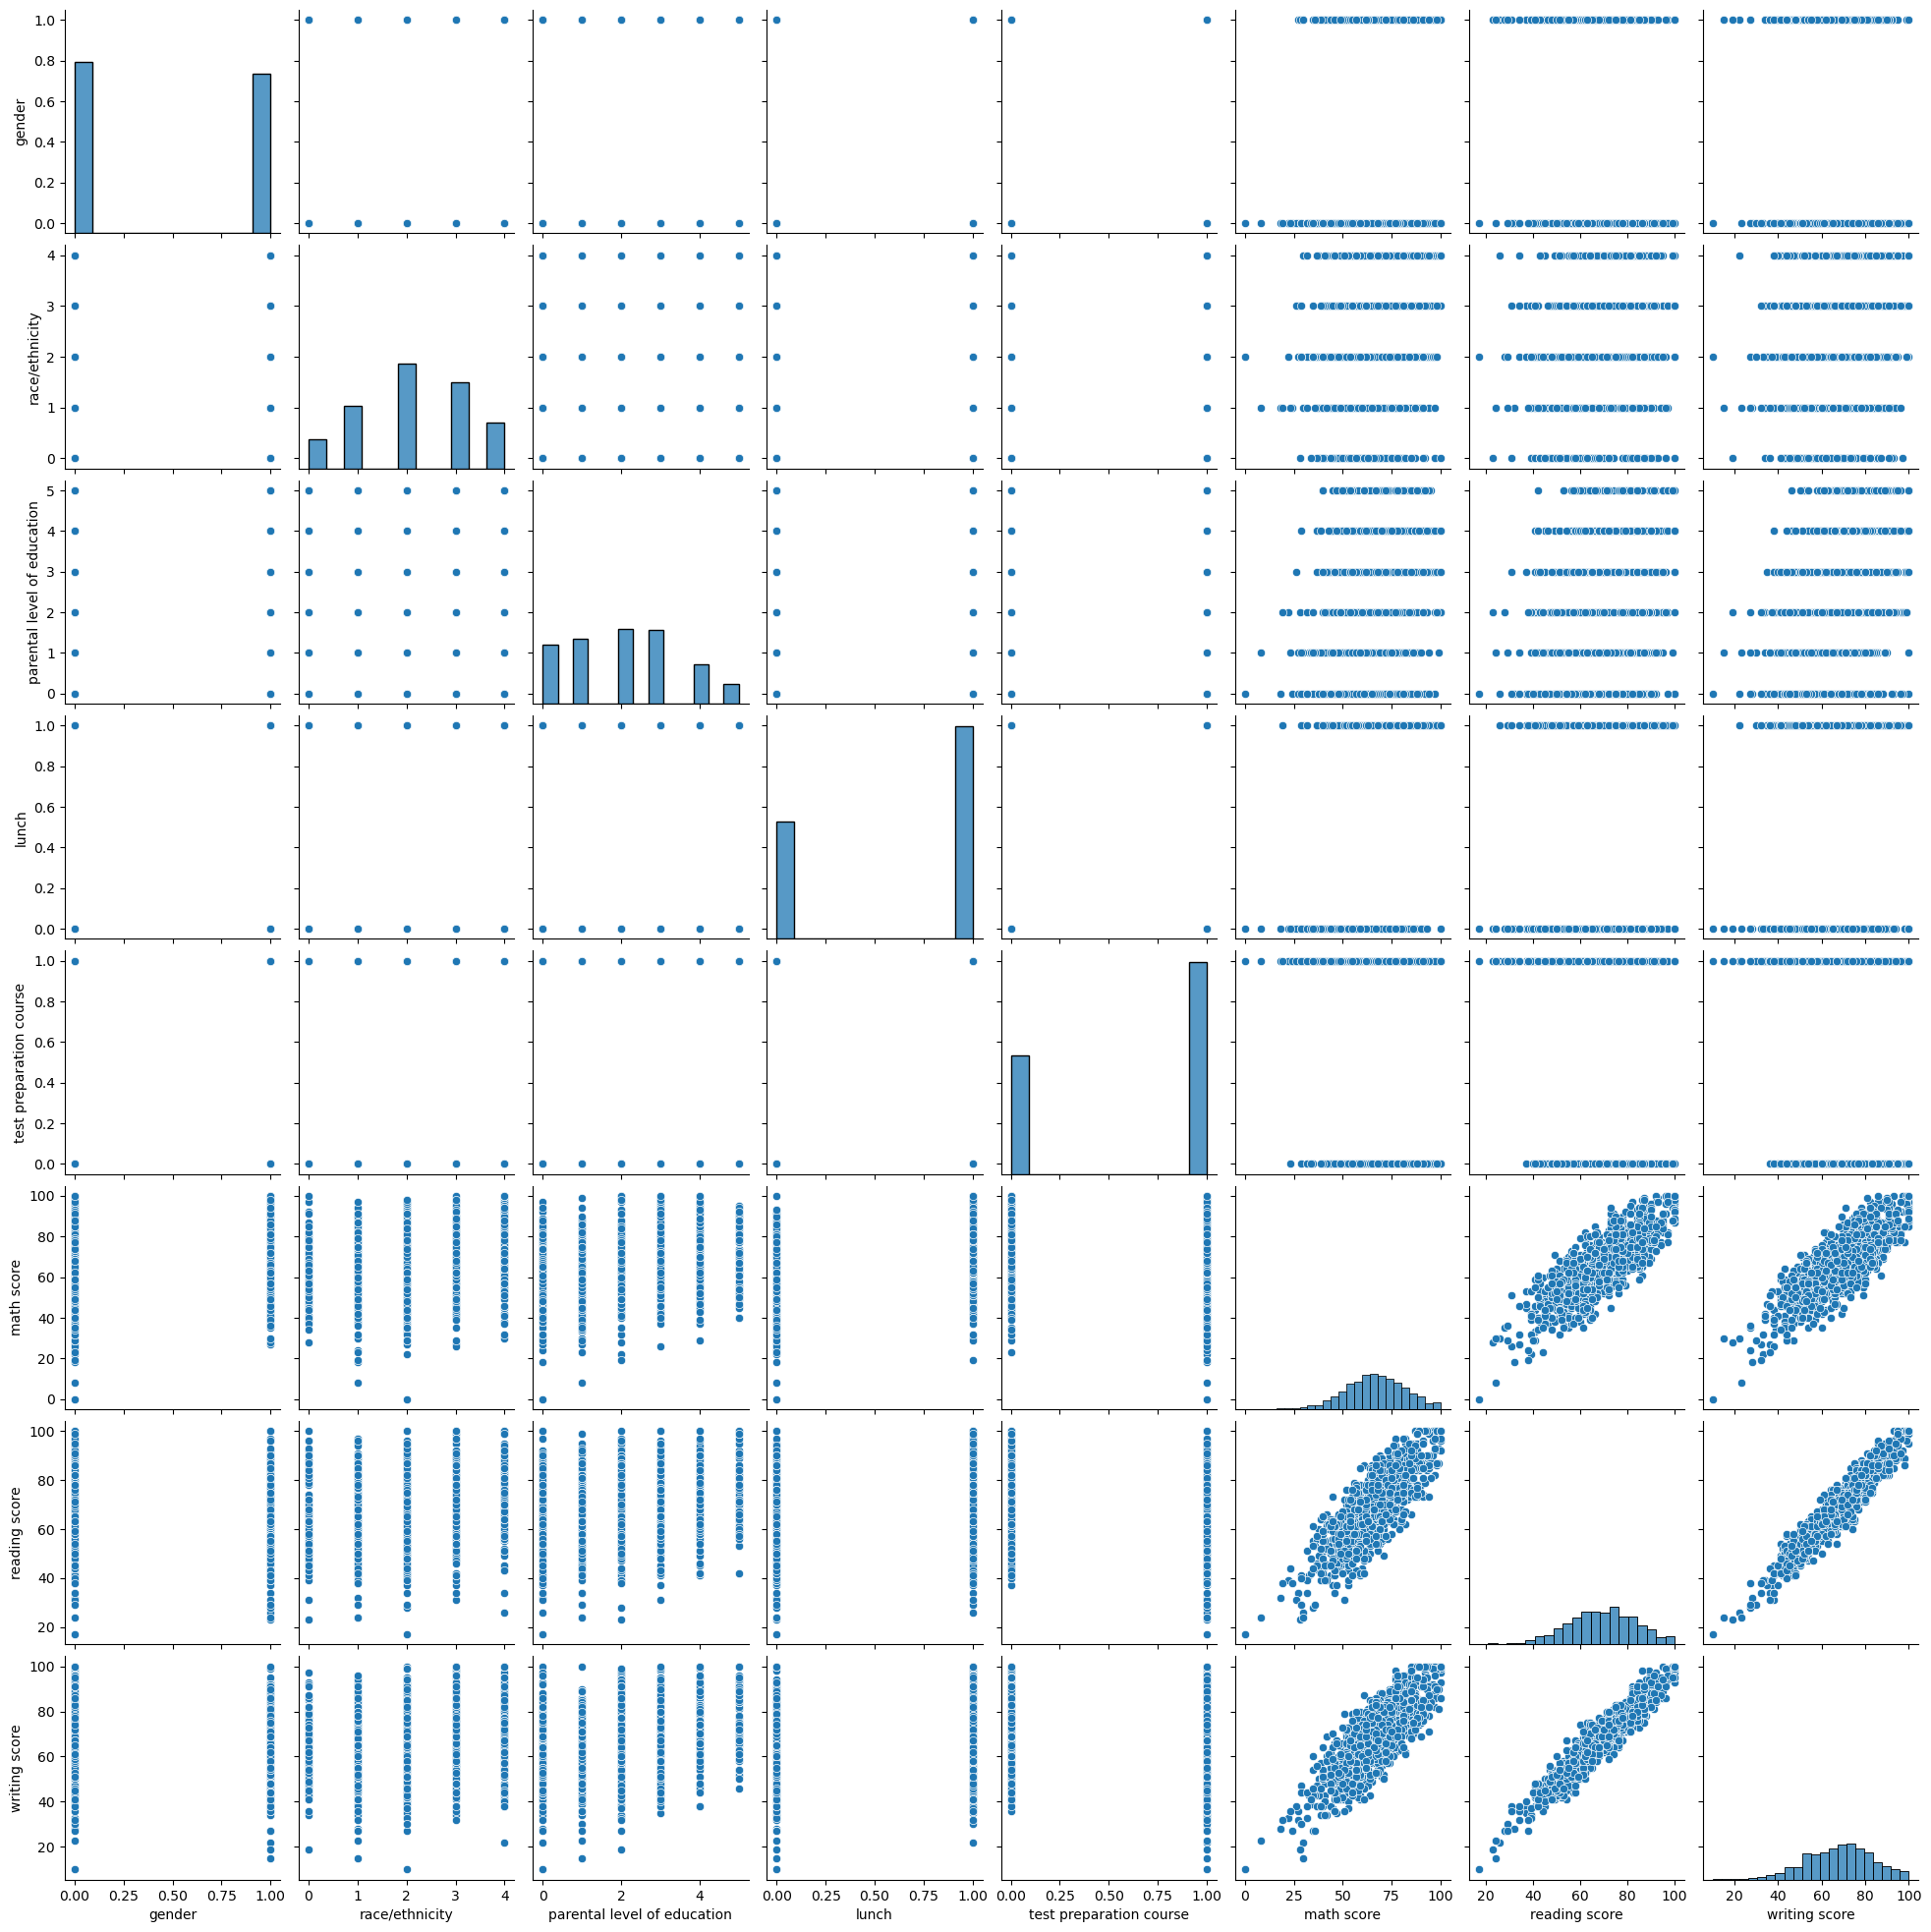

In [40]:
# pair plot
sns.pairplot(data)
plt.show()

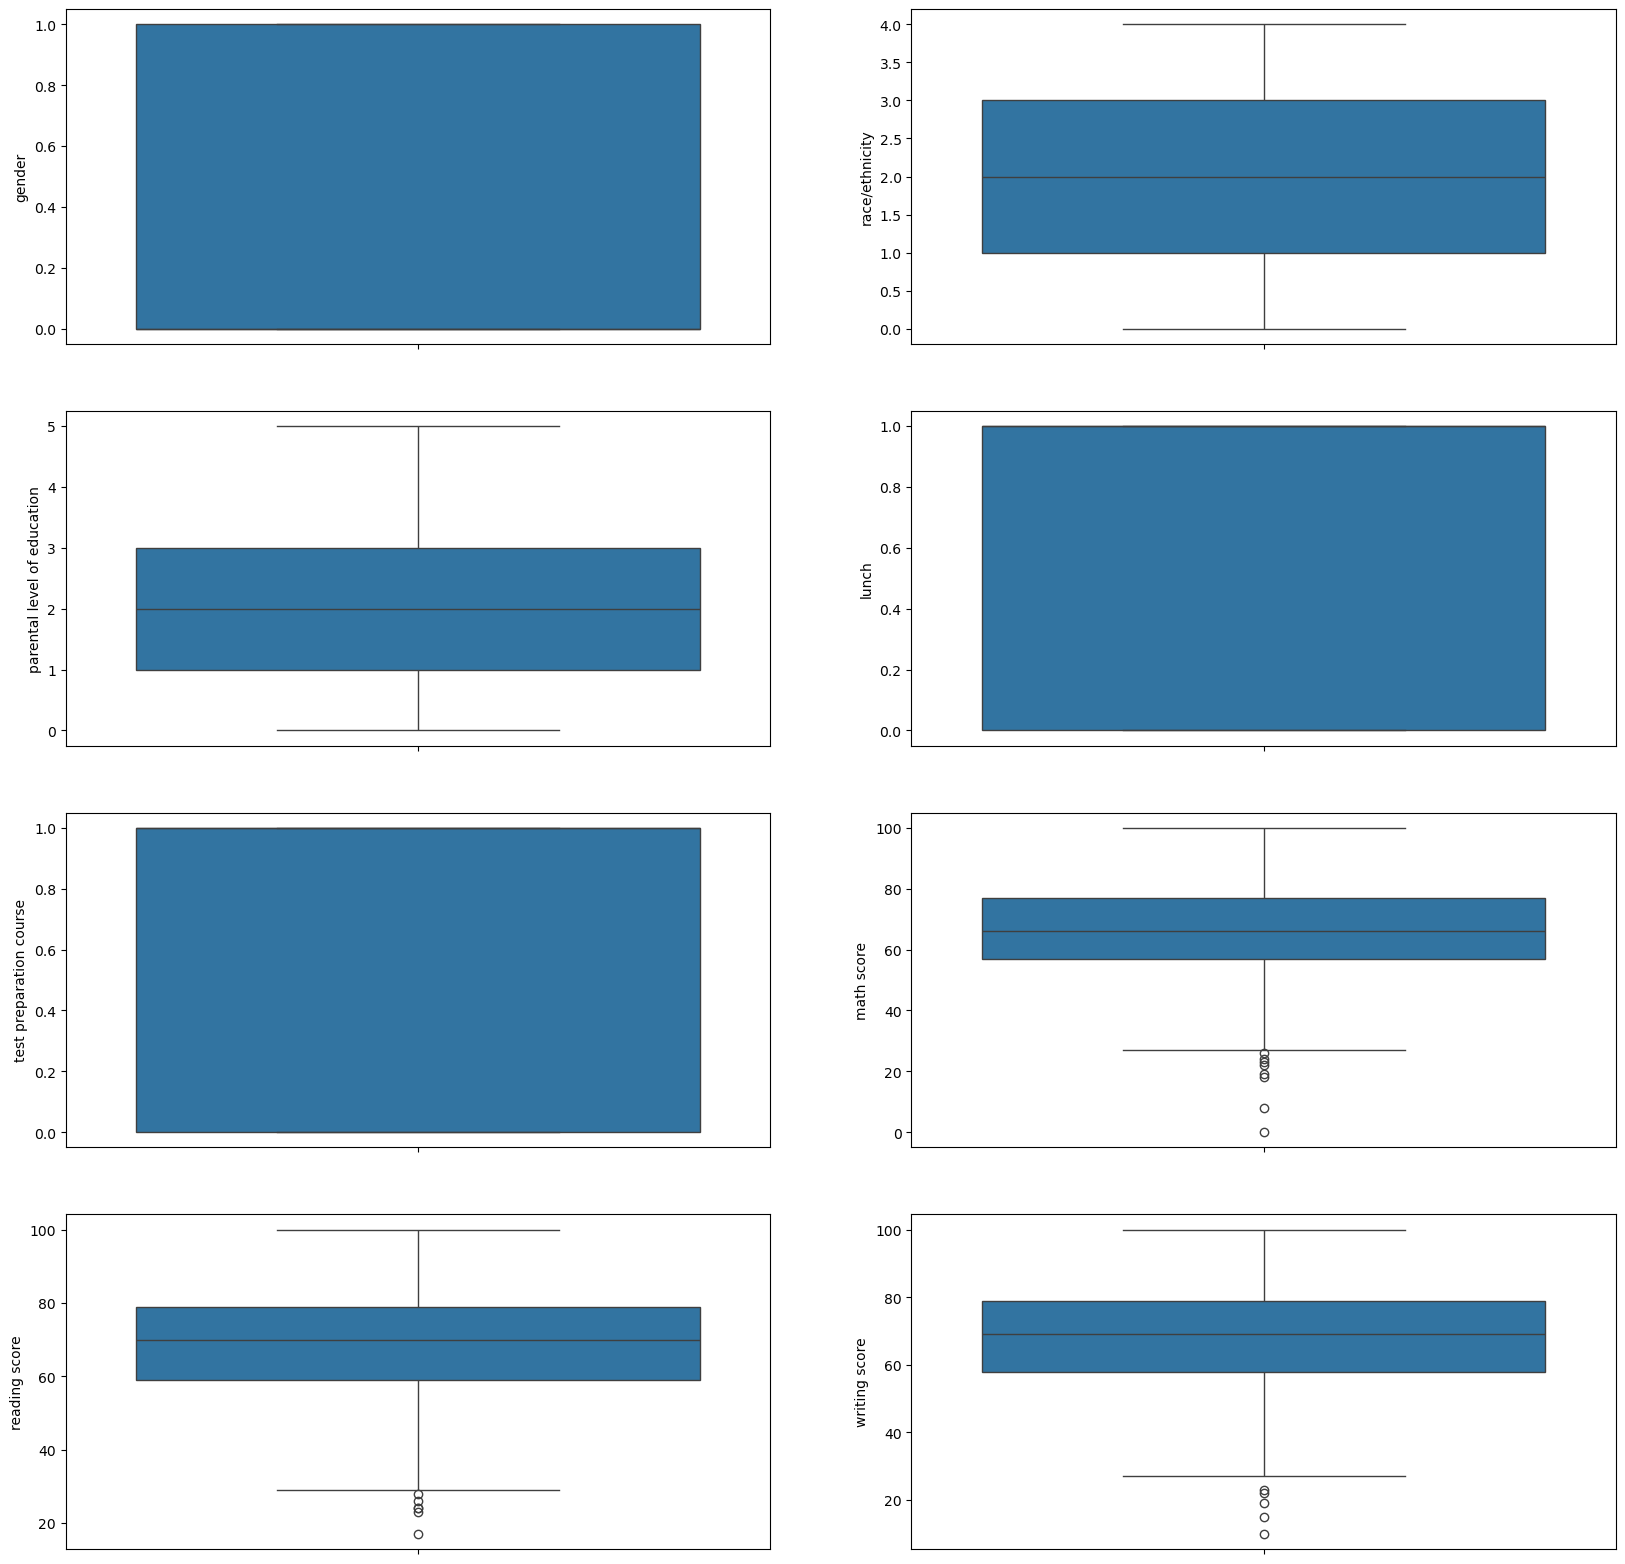

In [41]:
# plot boxplot to know outlier
plt.figure(figsize=(20,20))
s=1
for i in data.columns:
    plt.subplot(4,2,s)
    sns.boxplot(data[i])
    s+=1

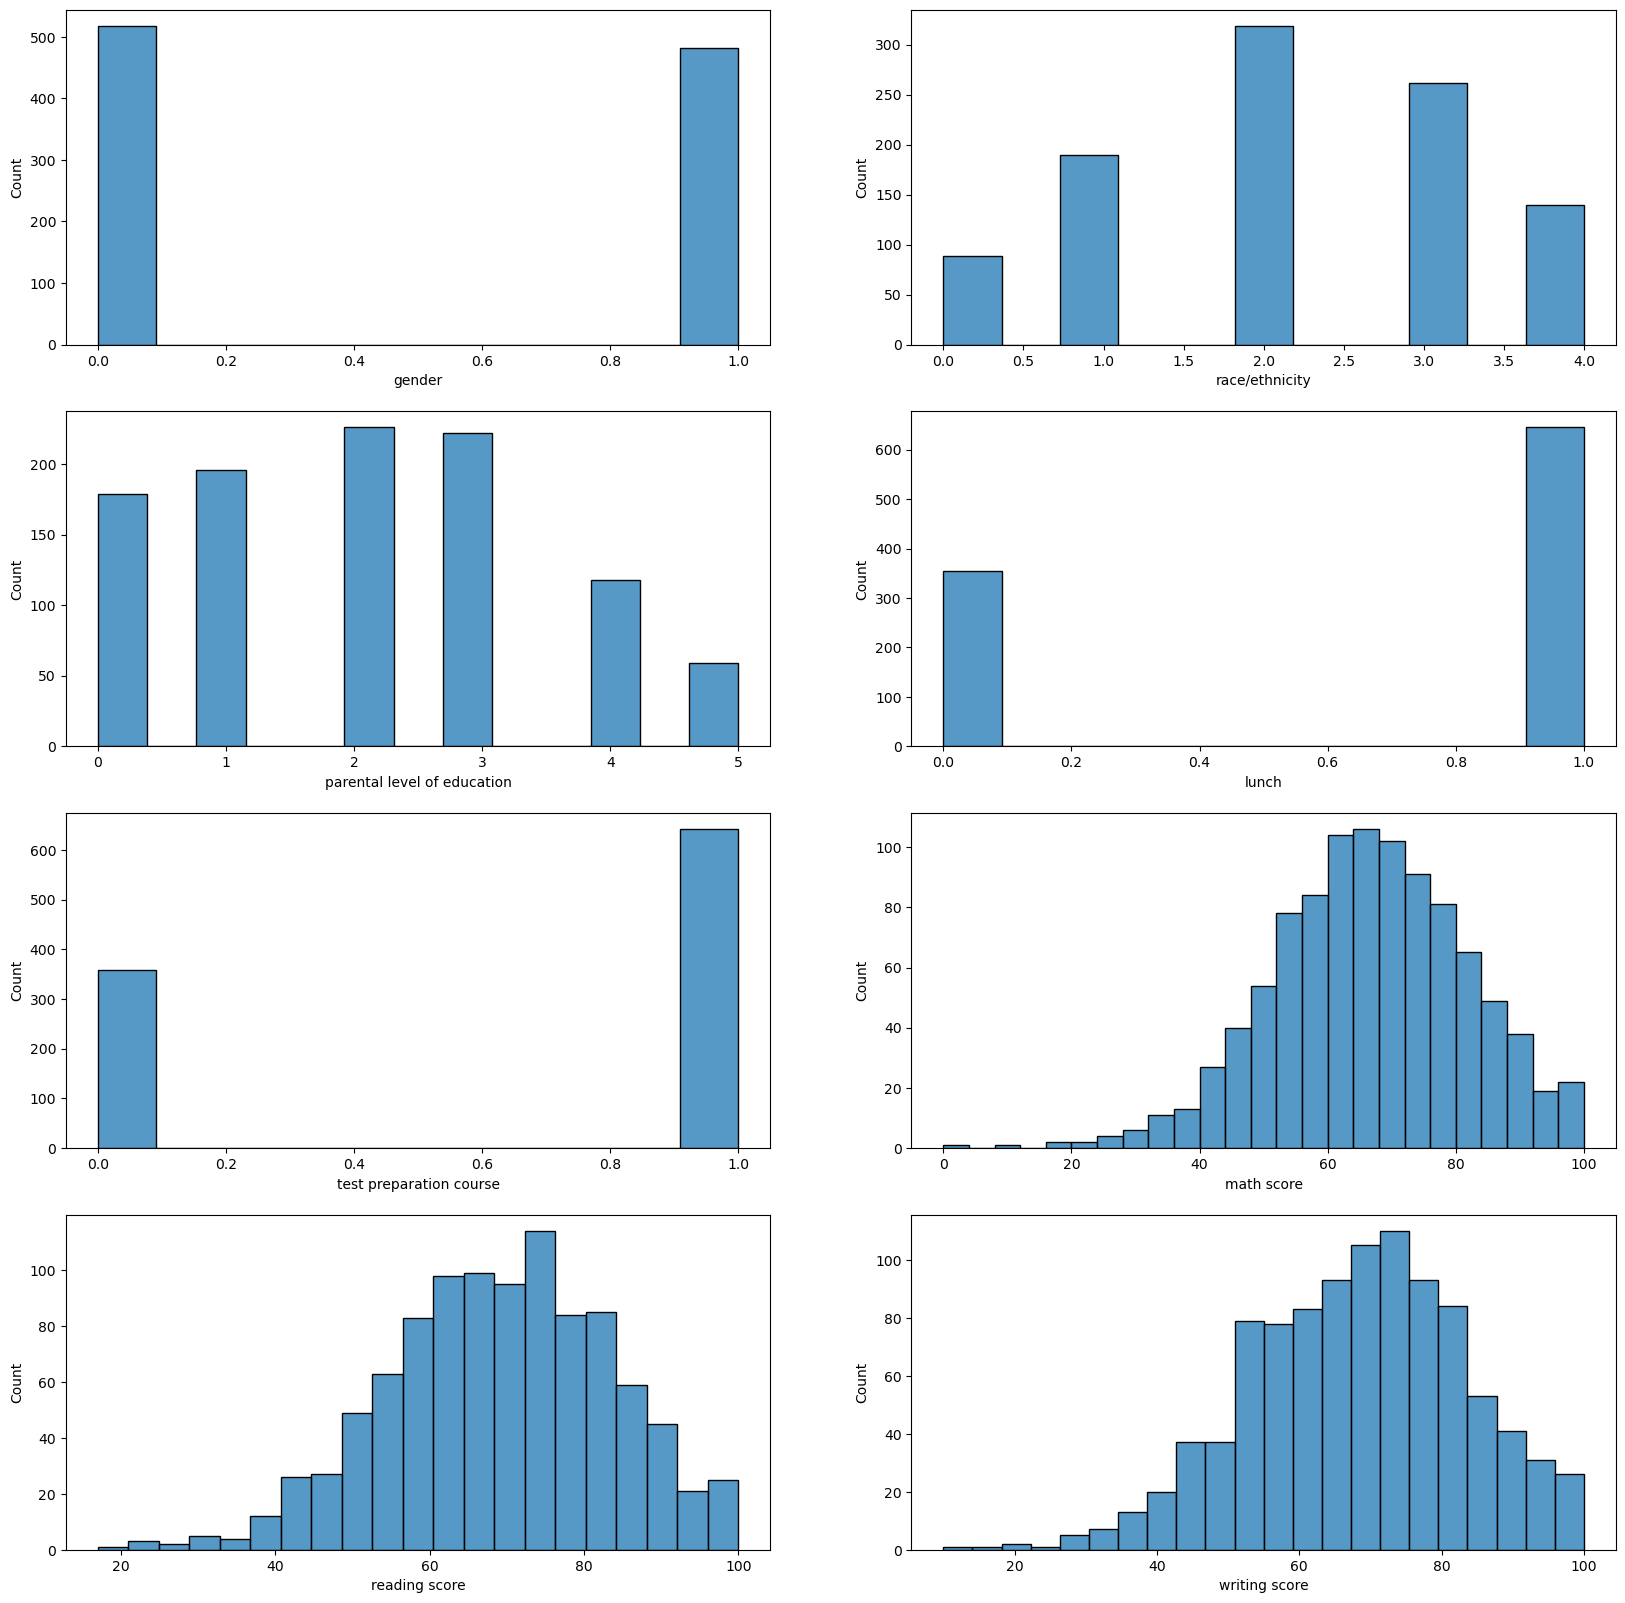

In [42]:
# plot histogram of data
plt.figure(figsize=(20,20))
s=1
for i in data.columns:
    plt.subplot(4,2,s)
    sns.histplot(data[i])
    s+=1

### 3-Data preprocessing

In [44]:
# # split data into feature(x) and label(y)
x=data.drop(['math score'],axis=1)
y=data['math score']

In [48]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,0,1,4.0,1,1,72,74
1,0,2,2.0,1,0,90,88
2,0,1,5.0,1,1,95,93
3,1,0,3.0,0,1,57,44
4,1,2,2.0,1,1,78,75


In [50]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [52]:
# split data into data_train and data_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,shuffle=True,random_state=42)

In [54]:
print('x_train shape :',x_train.shape)
print('y_train shape :',y_train.shape)

x_train shape : (800, 7)
y_train shape : (800,)


In [56]:
print('x_test shape :',x_test.shape)
print('y_test shape :',y_test.shape)

x_test shape : (200, 7)
y_test shape : (200,)


In [58]:
# show maximum value in columns
np.max(x_train,axis=0)

gender                           1.0
race/ethnicity                   4.0
parental level of education      5.0
lunch                            1.0
test preparation course          1.0
reading score                  100.0
writing score                  100.0
dtype: float64

In [60]:
# show miximum value in columns
np.min(x_train,axis=0)

gender                          0.0
race/ethnicity                  0.0
parental level of education     0.0
lunch                           0.0
test preparation course         0.0
reading score                  24.0
writing score                  15.0
dtype: float64

In [62]:
cols=x_train.columns

In [64]:
# scalling data
from sklearn.preprocessing import MinMaxScaler

Scaler=MinMaxScaler()
x_train=Scaler.fit_transform(x_train)
x_test=Scaler.transform(x_test)

In [66]:
x_train=pd.DataFrame(x_train,columns=cols)

In [68]:
x_test=pd.DataFrame(x_test,columns=cols)

In [70]:
x_train.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,0.0,0.75,1.0,1.0,1.0,0.605263,0.705882
1,0.0,0.50,0.8,0.0,0.0,0.776316,0.800000
2,0.0,0.75,0.4,0.0,1.0,0.855263,0.835294
3,1.0,0.50,1.0,0.0,1.0,0.565789,0.600000
4,1.0,1.00,0.2,1.0,1.0,0.526316,0.494118


### 4-Build Model

In [72]:
# build function to get all error matrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

def evaluate_model(actual,predicted):
    MSE=mean_squared_error(actual,predicted)
    MAE=mean_absolute_error(actual,predicted)
    RMSE=np.sqrt(mean_squared_error(actual,predicted))
    R2=r2_score(actual,predicted)
    return MSE,MAE,RMSE,R2

In [74]:
# import models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [76]:
# build models
models={
    'LinearRegression':LinearRegression(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor()
}

In [80]:
models_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    # fit model
    model.fit(x_train, y_train)
    # prediction model
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    # model evaluation
    train_MSE, train_MAE, train_RMSE, train_R2 = evaluate_model(y_train, y_train_pred)
    test_MSE, test_MAE, test_RMSE, test_R2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    
    print("Model training performance: ")
    print('mean_squared_error = ', train_MSE)
    print('mean_absolute_error = ', train_MAE)
    print('root_mean_squared_error = ', train_RMSE)
    print('r2_score = ', train_R2)
    
    print('--' * 10)
    
    print("Model testing performance: ")
    print('mean_squared_error = ', test_MSE)
    print('mean_absolute_error = ', test_MAE)
    print('root_mean_squared_error = ', test_RMSE)
    print('r2_score = ', test_R2)
    print('--' * 40)
    r2_list.append(test_R2)


LinearRegression
Model training performance: 
mean_squared_error =  30.978868295272893
mean_absolute_error =  4.463351233692993
root_mean_squared_error =  5.565866356217412
r2_score =  0.862589426684221
--------------------
Model testing performance: 
mean_squared_error =  27.894795173633547
mean_absolute_error =  4.126475424095519
root_mean_squared_error =  5.2815523450623445
r2_score =  0.885366242345501
--------------------------------------------------------------------------------
KNeighborsRegressor
Model training performance: 
mean_squared_error =  35.4693
mean_absolute_error =  4.713
root_mean_squared_error =  5.955610799909611
r2_score =  0.8426715656087067
--------------------
Model testing performance: 
mean_squared_error =  65.137
mean_absolute_error =  6.405
root_mean_squared_error =  8.070749655391376
r2_score =  0.7323192722562489
--------------------------------------------------------------------------------
DecisionTreeRegressor
Model training performance: 
mean_squar

In [82]:
# score of model
score_data=pd.DataFrame(list(zip(models_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

In [84]:
score_data

,Model Name,R2_Score
0,LinearRegression,0.885366
3,RandomForestRegressor,0.849748
4,XGBRegressor,0.831315
2,DecisionTreeRegressor,0.748129
1,KNeighborsRegressor,0.732319


In [86]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

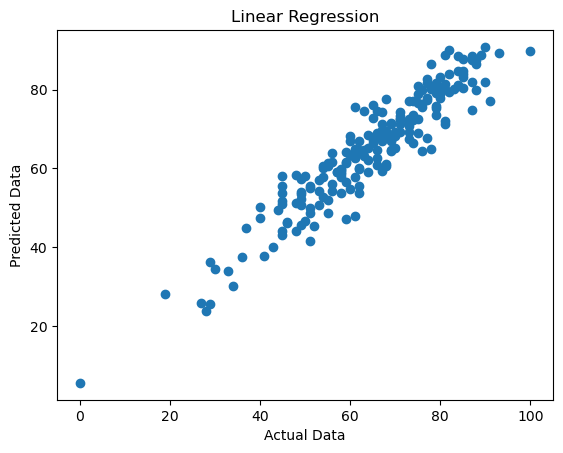

In [90]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Linear Regression')
plt.show()

<Axes: xlabel='math score'>

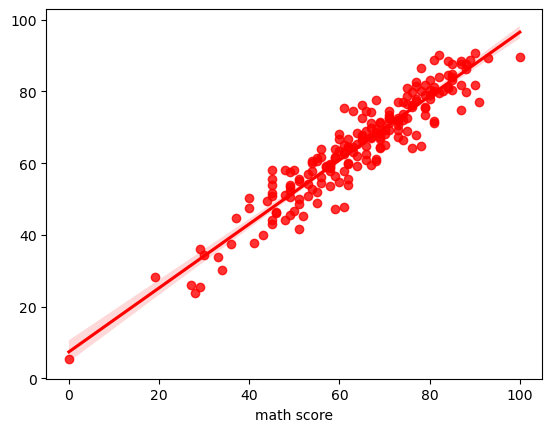

In [92]:
sns.regplot(x=y_test,y=y_pred,color='r')

In [94]:
prediction_df=pd.DataFrame({'Actual values':y_test,'Prediction values':y_pred,'Diffirance':y_test - y_pred})

In [96]:
prediction_df

,Actual values,Prediction values,Diffirance
521,91,77.195792,13.804208
737,53,57.016917,-4.016917
740,80,78.886219,1.113781
660,74,77.060283,-3.060283
411,84,84.685939,-0.685939
...,...,...,...
408,52,45.326902,6.673098
332,62,59.761941,2.238059
208,74,66.352357,7.647643
613,65,67.934570,-2.934570
